# Intro to Supervised Machine Learning

## Table of Contents

insert table of contents here

## Classification

#### Loading and preparing the data

In [1]:
from sklearn.datasets import load_iris, fetch_california_housing
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["target"] = iris["target"]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking for anomalies

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### Quick EDA

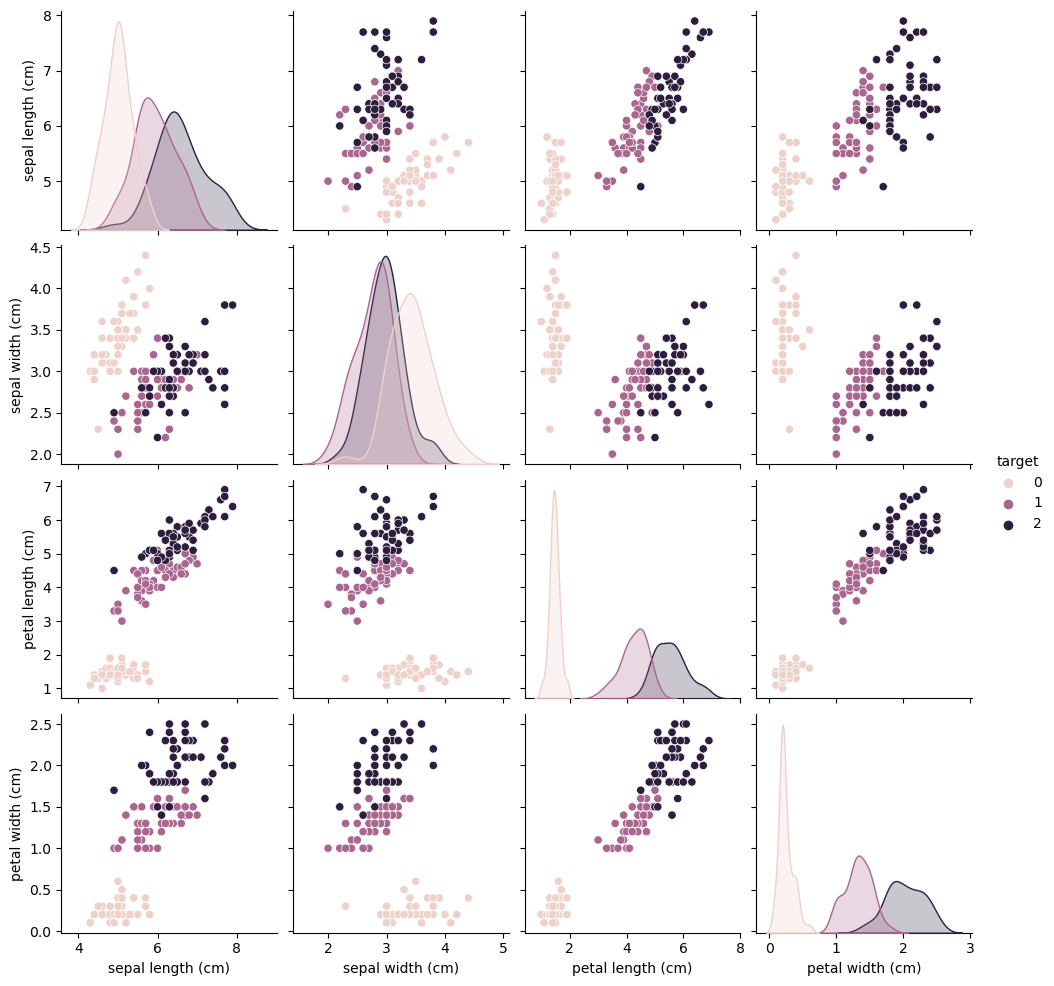

In [5]:
sns.pairplot(df, hue="target")
plt.show()

#### Train Test Split

First we need to distinguish from features and target

In [6]:
features = df.drop(columns = ["target"])
target = df["target"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [43]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [44]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [45]:
y_train.head()

137    2
84     1
27     0
127    2
132    2
Name: target, dtype: int32

For this dataset we will use KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

Creating an instance of the model, for now, we will use n_neighbors=3 (we will see how to optimize this hyperparameter later)

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)

Training the model

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now, our model is already trained, we can make predictions for new data points

In [86]:
pred = knn.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

Let's compare with the true labels

In [87]:
y_test.values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

It seems that our model was able to correctly predict the great majority of data points. To be precise, 29 out of 30 data points were correctly labeled.

In order to evaluate our model, we will use the method "score" that will give us accuracy.

In [49]:
knn.score(X_test, y_test)

0.9666666666666667

## Regression

#### Loading and preparing the data

In [50]:
california = fetch_california_housing()
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [51]:
df_cali = pd.DataFrame(california["data"], columns = california["feature_names"])
df_cali["median_house_value"] = california["target"]

df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Checking for anomalies

In [52]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Quick EDA

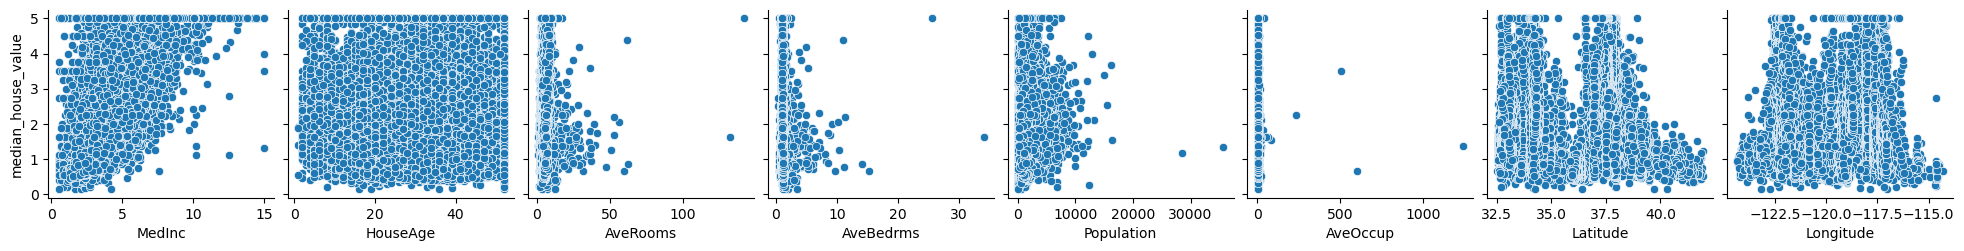

In [53]:
sns.pairplot(df_cali, y_vars=['median_house_value'], x_vars=df_cali.columns[:-1], kind='scatter')

#### Train Test Split

First we need to distinguish from features and target

In [54]:
features = df_cali.drop(columns = ["median_house_value"])
target = df_cali["median_house_value"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [67]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.876298,28.619065,5.432607,1.096174,1425.437742,3.030518,35.624783,-119.563008
std,1.906783,12.600999,2.523415,0.489529,1143.062756,6.441340,2.136552,2.005251
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000
25%,2.566625,18.000000,4.447644,1.005760,785.000000,2.428016,33.930000,-121.800000
50%,3.548500,29.000000,5.234243,1.048720,1166.000000,2.817937,34.250000,-118.490000
75%,4.747575,37.000000,6.059008,1.100000,1724.000000,3.283243,37.710000,-118.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000


In [56]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36


In [58]:
y_train.head()

12069    5.00001
15925    2.70000
11162    1.96100
4904     1.18800
4683     2.25000
Name: median_house_value, dtype: float64

In [71]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


### Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, we will use KNN Regressor, we will use hyperparameter n_neighbors = 10.

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
knn = KNeighborsRegressor(n_neighbors=10)

In [78]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

Here we take a look at our predictions

In [84]:
random_house = []
for column in X_train.columns:
    user_input = input(f"what is your input for {column}?")
    random_house.append(user_input)

what is your input for MedInc?10
what is your input for HouseAge?30
what is your input for AveRooms?6
what is your input for AveBedrms?4
what is your input for Population?2000
what is your input for AveOccup?2
what is your input for Latitude?1250
what is your input for Longitude?2525


In [85]:
random_house

['10', '30', '6', '4', '2000', '2', '1250', '2525']

In [87]:
import numpy as np

rh_array = np.array(random_house)

In [93]:
rh_array = rh_array.reshape(1,-1)

In [96]:
rh_scaled = scaler.transform(rh_array)

C:\Users\Aleks\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [97]:
knn.predict(rh_scaled)

array([0.6549])

In [80]:
y_test

14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
6655     1.695
3505     2.046
1919     1.286
1450     2.595
4148     1.676
Name: median_house_value, Length: 4128, dtype: float64

We are going to evaluate our model performance with R-Squared

In [81]:
knn.score(X_test_scaled, y_test)

0.69908705146437

Pretty bad model, remember, we want R2 as high as possible!

KNN is a distance base model, features having different scales are having an impact on the model's performance.

In [83]:
import random 
random.choice(range(10))

5